# Task 2-The Sparks Foundation

### Manoj Deshmukh - Intern

##### Problem statement-  Predict percentage score for given records using no. of hours studied using regression alogorithm.

Import all required libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

Read the given dataset from given link

In [136]:
score=pd.read_csv("http://bit.ly/w-data")

### Perform EDA on the given data

Get top 10 records from the dataset

In [137]:
score.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Get information about the data

In [138]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


The dataset does'nt have any nulls, zeros or blanks

In [139]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Check for outliers in the data

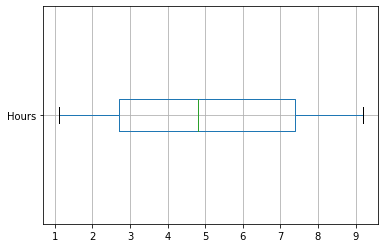

In [140]:
score.boxplot("Hours",vert=False)

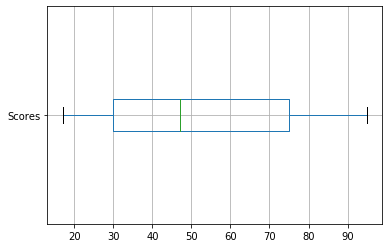

In [141]:
score.boxplot("Scores",vert=False)

###### From above graps, it is clear that there is no outliers in the dataset

Plot a correlation matrix

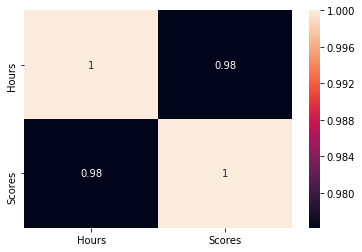

In [142]:
corrMatrix = score.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Plot distribution of scores w.r.t. score

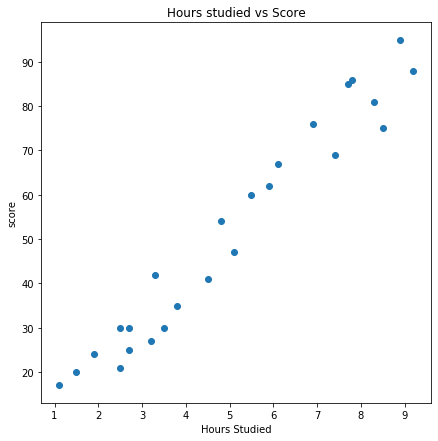

In [143]:
plt.figure(figsize=(7,7))
plt.scatter(score.Hours, score.Scores)
plt.title('Hours studied vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('score')
plt.show()

### Prepare the data

Split given dataset into dependent and independent variables

In [144]:
train = score.iloc[:, :-1].values  
test = score.iloc[:, 1].values

Split the variables into training and testing

In [145]:
from sklearn.model_selection import train_test_split  
trainX, testX, trainY, testY = train_test_split(train, test, test_size=0.2, random_state=0) 
print('trainX={},trainY={},testX={},testY={}'.format(trainX.shape,trainY.shape,testX.shape,testY.shape))

trainX=(20, 1),trainY=(20,),testX=(5, 1),testY=(5,)


### Train our algorithm

Train our algorithm using linear regression

In [146]:
regressor = LinearRegression()  
regressor.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Draw a regression line

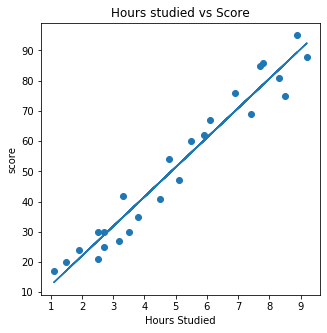

In [147]:
plt.figure(figsize=(5,5))
plt.scatter(score.Hours, score.Scores)
plt.title('Hours studied vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('score')
m, b = np.polyfit(score.Hours, score.Scores, 1)
plt.plot(score.Hours, m*score.Hours + b)
plt.show()

### Make predictions

Make predictions on test data using trained model

In [148]:
predY = regressor.predict(testX)
print(predY)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


Create a dataframe using actual and predicted score

In [149]:
dataframe={'actual':testY,'prediction':predY}
dataframe=pd.DataFrame(dataframe)
print(dataframe)

   actual  prediction
0      20   16.884145
1      27   33.732261
2      69   75.357018
3      30   26.794801
4      62   60.491033


### Evaluate the model

Evaluate the performance of the alogorithm

In [150]:
print('Mean Absolute Error:',metrics.mean_squared_error(testY, predY))
print('Mean Absolute Error:',metrics.mean_absolute_error(testY, predY))

Mean Absolute Error: 21.5987693072174
Mean Absolute Error: 4.183859899002975


Get percentage score for any hour value

In [151]:
hours = 9.25
ans_score = regressor.predict(np.array([hours]).reshape(1,1))
print("Hours Studied = {}".format(hours))
print("Predicted Score = {}".format(ans_score[0]))

Hours Studied = 9.25
Predicted Score = 93.69173248737538


### Thank you!! 